In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import gc
warnings.filterwarnings("ignore")

/Users/sparshtekriwal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Checking for variables in memory 

In [2]:
gc.collect()
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)


for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           _i2:  601.0 B
                           _oh:  248.0 B
                           Out:  248.0 B
                            _i:  247.0 B
                           _i1:  247.0 B
                    sizeof_fmt:  144.0 B
                       __doc__:  113.0 B
                           _ih:  104.0 B
                            In:  104.0 B
                   __builtin__:   88.0 B
                  __builtins__:   88.0 B
                            pd:   88.0 B
                            np:   88.0 B
                           plt:   88.0 B
                           sns:   88.0 B
                      warnings:   88.0 B
                        pickle:   88.0 B
                            gc:   88.0 B
                           sys:   88.0 B
                           _dh:   80.0 B


### Reading File and Scaling Numerical Predictors

In [3]:
# Reading File as df
df = pd.read_csv("train.tsv",sep="\t", nrows=10000)
# df_copy = df
df.index=df["train_id"]
del df["train_id"]
print("Before Scaling Condition ID")
display(df.head(5))


# Scaling Item condition column
from sklearn.preprocessing import MinMaxScaler as mms
# Scaling feature for linear models
df["item_condition_id"]=mms().fit_transform(df["item_condition_id"].to_numpy().reshape(-1,1))
print("After Scaling Condition ID")
display(df.head(5))

Before Scaling Condition ID


,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


After Scaling Condition ID


,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,0.5,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,0.5,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,0.0,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,0.0,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,0.0,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### Data Exploration and Preprocessing

In [4]:
for col in ["name", "item_description"]:
    print("Avg number of words in the feature--%s: %s"%(col, df[col].apply(lambda x: len(str(x).split())).mean()))

Avg number of words in the feature--name: 4.4077
Avg number of words in the feature--item_description: 25.6353


In [5]:
pd.DataFrame(df.isna().sum(), columns=["Missing Values"])

,Missing Values
name,0
item_condition_id,0
category_name,47
brand_name,4261
price,0
shipping,0
item_description,0


In [6]:
# splitting Category Women/Jewelry/Necklaces into three distinct columns general_cat, subcat_1, subcat_2 and storing it back to data frame
    
def split_categories(df):
    new_df = df.copy()
    new_df["category_name"].replace(to_replace="Unknown",value="Unknown/Unknown/Unknown", inplace=True)
    new_df["category_name"].fillna("Unknown/Unknown/Unknown",inplace=True)
    #Splitting the category_name into 3 categories:
    new_df['general_cat'], new_df['subcat_1'], new_df['subcat_2'] = zip(*new_df['category_name'].apply(lambda x: x.split("/")))
    new_df.drop(["category_name"], axis=1, inplace=True)
    return new_df

df = split_categories(df)
display(df)

,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2
train_id,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,0.50,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,0.50,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,0.00,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,0.00,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,0.00,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...
9995,Halloween nail stickers,0.00,NaN,3.0,1,New. Both sets included *please only purchase ...,Beauty,Makeup,Nails
9996,NWT Wildfox Fringe Top XS Coachella,0.00,Wildfox Couture,17.0,0,NWT Wildfox Coachella Fringe Top size XS. Mint...,Women,Tops & Blouses,T-Shirts
9997,Like New Baby Carrier,0.25,Chicco,15.0,1,Excellent condition. No tears no stains used m...,Kids,Gear,Backpacks & Carriers


- There is alot of variance in the Price column which is our target variable
- The histogram is skewed to the Right
- After taking log of the price column, we get a distribution that looks normally distributed
- Hence we will be using log transformation our output column and adding one to deal with 0 values

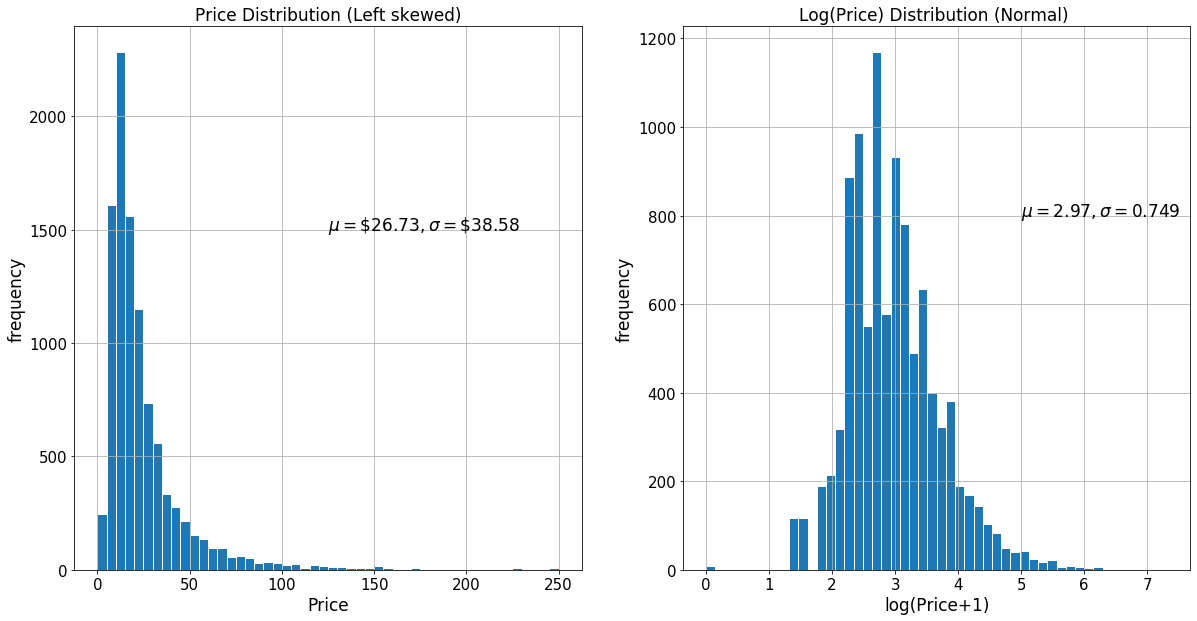

In [7]:
plt.subplot(1, 2, 1)
(df['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('Price', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.text(125, 1500, r'$\mu=\$ 26.73, \sigma=\$ 38.58 $', fontsize=17)
plt.grid()
plt.title('Price Distribution (Left skewed)', fontsize=17)

plt.subplot(1, 2, 2)
np.log1p(df['price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(Price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.text(5, 800, r'$\mu= 2.97 , \sigma= 0.749 $', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Price) Distribution (Normal) ', fontsize=17)
plt.grid()
plt.show()

In [8]:
print("Mean log price: "+ str(np.log1p(df['price']).mean()))

Mean log price: 2.96904885842168


In [9]:
print("Mean log price: "+ str(np.log1p(df['price']).std()))

Mean log price: 0.7419182565636051


In [10]:
df.describe()

,item_condition_id,price,shipping
count,10000.000000,10000.000000,10000.000000
mean,0.226250,26.429900,0.453900
std,0.227027,39.385515,0.497895
min,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000
50%,0.250000,16.000000,0.000000
75%,0.500000,29.000000,1.000000
max,1.000000,1506.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               10000 non-null  object 
 1   item_condition_id  10000 non-null  float64
 2   brand_name         5739 non-null   object 
 3   price              10000 non-null  float64
 4   shipping           10000 non-null  int64  
 5   item_description   10000 non-null  object 
 6   general_cat        10000 non-null  object 
 7   subcat_1           10000 non-null  object 
 8   subcat_2           10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 781.2+ KB


### No signs of multicolianrity with the numerical columns

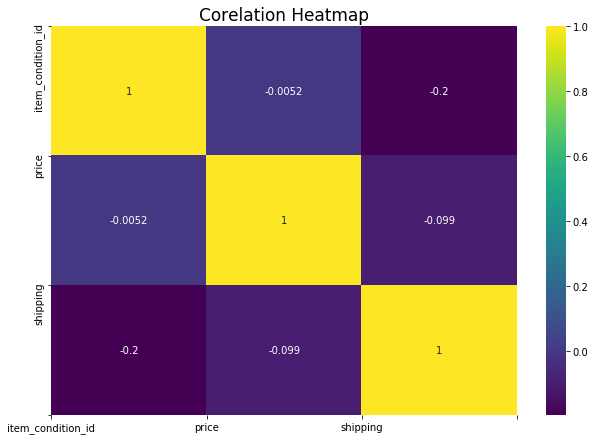

In [12]:

plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.tight_layout()
plt.title("Corelation Heatmap", fontsize=17)
plt.show()

### Plotting the Top N brands irrespective of category

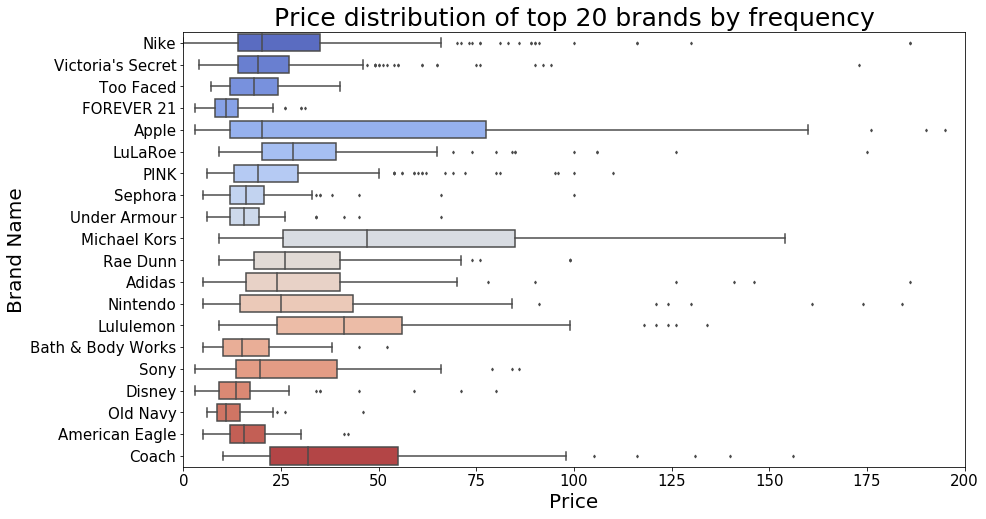

Nike                 350
PINK                 348
Victoria's Secret    322
LuLaRoe              201
Apple                111
FOREVER 21           108
Nintendo              99
Michael Kors          87
Sephora               86
Bath & Body Works     85
Lululemon             85
Rae Dunn              80
Adidas                77
Disney                72
American Eagle        68
Coach                 66
Under Armour          60
Old Navy              59
Too Faced             52
Sony                  48
Name: brand_name, dtype: int64


In [13]:
def plot_topn_brands(topn):
    
    frequently_listed_brands=list(df["brand_name"].value_counts().iloc[:topn].index)
    value_counts = list(df["brand_name"].value_counts().iloc[:topn].values)
    value_counts = ["n: " + str(i) for i in value_counts]
    fig = plt.figure(1, figsize=(14, 8))
    data = df[df["brand_name"].isin(frequently_listed_brands)]
    sns.boxplot(x="price", y="brand_name", data=data, fliersize=2, palette="coolwarm")
    plt.title("Price distribution of top %s brands by frequency"%(topn), fontsize=25)
    plt.xlim(0,200)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("Price", fontsize=20)
    plt.ylabel("Brand Name", fontsize=20)
    plt.show()
    print(df["brand_name"].value_counts()[:topn])
    
plot_topn_brands(20)

In [14]:
df["brand_name"].value_counts()[200:]

Motherhood Maternity    4
Keurig                  4
Oakley                  4
Similac                 4
Star Wars               4
                       ..
Longchamp               1
Ben Nye                 1
Pacific Sunwear         1
Cartier                 1
TopShop                 1
Name: brand_name, Length: 561, dtype: int64

In [15]:
print("There are %d unique geenral categories." % df['general_cat'].nunique())
print("There are %d unique first sub-categories." % df['subcat_1'].nunique())
print("There are %d unique second sub-categories." % df['subcat_2'].nunique())
print("There are %d unique brand names in the training dataset." % df['brand_name'].apply(lambda x:str(x).lower()).nunique())

There are 11 unique geenral categories.
There are 106 unique first sub-categories.
There are 478 unique second sub-categories.
There are 762 unique brand names in the training dataset.


### One Hot Encoding Categorical Features - Categories and Brands

- As some brands have very few products listed, we will only consider the top n brands as features for our model and put the others into another group called "non-frequent brands"
- "combine_category_and_brand_vectors" function returns a sparse martix containing the vectorized brands and Categories column list will help keep track of the original features

In [16]:
# Takes df and topn as parameter and returns a dataframe
def vectorize_brand_name(df, topn=-1):
    frequently_listed_brands=list(df["brand_name"].value_counts().iloc[:topn].index)
    brand_df =  pd.get_dummies(df["brand_name"].apply(lambda x: "non-frequent brands" if x not in frequently_listed_brands else x), prefix="Brand")
    return brand_df.drop(["Brand_non-frequent brands"], axis=1)
# vectorize_brand_name(df).head(10)

# Taking all 11 categories and returning a dataframe Gen_Cat_name. Unknown category is omitted
def vectorize_general_cat(df, topn=11):
    frequently_listed_categories=list(df["general_cat"].value_counts().iloc[:topn].index)
    category_df =  pd.get_dummies(df["general_cat"].apply(lambda x: "non-frequent categories" if x not in frequently_listed_categories else x), prefix="Gen_Cat")
    try:
        return category_df.drop(["Gen_Cat_Unknown","non-frequent categories"], axis=1)
    except:
        return category_df.drop(["Gen_Cat_Unknown"], axis=1)
# vectorize_general_cat(df).head(10)    

# Taking top n sub categories 1 out of 106 and returning a dataframe Sub_Cat_1_name
def vectorize_sub_cat_1(df, topn=-1):
    frequently_listed_categories=list(df["subcat_1"].value_counts().iloc[:topn].index)
    category_df =  pd.get_dummies(df["subcat_1"].apply(lambda x: "non-frequent categories" if x not in frequently_listed_categories else x), prefix="Sub_Cat_1")
    try:
        return category_df.drop(["Sub_Cat_1_Unknown", "Sub_Cat_1_non-frequent categories"], axis=1)
    except:
        return category_df.drop(["Sub_Cat_1_Unknown"], axis=1)
# vectorize_sub_cat_1(df).head(10)    

# Taking top n sub categories 2 out of 762 and returning a dataframe Sub_Cat_2_name
def vectorize_sub_cat_2(df, topn=-1):
    frequently_listed_categories=list(df["subcat_2"].value_counts().iloc[:topn].index)
    category_df =  pd.get_dummies(df["subcat_2"].apply(lambda x: "non-frequent categories" if x not in frequently_listed_categories else x), prefix="Sub_Cat_2")
    try:
        return category_df.drop(["Sub_Cat_2_Unknown", "Sub_Cat_2_non-frequent categories"], axis=1)
    except:
        return category_df.drop(["Sub_Cat_2_Unknown"], axis=1)
# vectorize_sub_cat_2(df).head(10)  


def combine_category_and_brand_vectors(dataFrame):
    from scipy.sparse import csr_matrix, hstack
    brands = vectorize_brand_name(dataFrame)
    gen_cat = vectorize_general_cat(dataFrame)
    sub_cat_1 = vectorize_sub_cat_1(dataFrame)
    sub_cat_2 = vectorize_sub_cat_2(dataFrame)
    sparse_array_cat_brands =  hstack(( csr_matrix(brands), csr_matrix(gen_cat), csr_matrix(sub_cat_1), csr_matrix(sub_cat_2) )).tocsr()
    column_list = list(brands.columns)+list(gen_cat.columns)+list(sub_cat_1.columns)+list(sub_cat_2.columns)
    return sparse_array_cat_brands, column_list


# array_cat_brand, column_cat_brand = combine_category_and_brand_vectors(df[df["lemmatized_text"]!=""])


### Checking for variables in memory 

In [17]:
# gc.collect()
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)


for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                            df:  6.9 MiB
                             _: 61.0 KiB
                           _14: 61.0 KiB
                            _i:  2.9 KiB
                          _i16:  2.9 KiB
                           mms:  1.2 KiB
                           ___: 1012.0 B
                            _5: 1012.0 B
                          _i13:  823.0 B
                           _i7:  743.0 B
                           _i6:  714.0 B
                            __:  707.0 B
                           _10:  707.0 B
                          _i17:  603.0 B
                           _i2:  601.0 B
                           _i3:  510.0 B
                           _ii:  410.0 B
                          _i15:  410.0 B
                           _ih:  272.0 B
                            In:  272.0 B


### Processing Text Columns 

#### Combining Name and Description Columns 
- Converting to lower case to avoid duplicates
- Removing dummy text "No description yet" from description feature as we are making the "assumption" that a missing descrition doesn't impact the price 

In [18]:
df["unprocessed_text"] =  df["name"] +" "+ df["item_description"].replace(to_replace="No description yet",value="")
df["unprocessed_text"] = df["unprocessed_text"].apply(lambda x: str(x).lower())

### Counts of words as tuples before preprocessing

In [19]:
from collections import Counter
import operator
sorted(Counter(' '.join(df["unprocessed_text"]).lower().split()).items(), key=operator.itemgetter(1), reverse=False )

[('chroma', 1),
 ('synapse', 1),
 ('ava-viv', 1),
 ('statues', 1),
 ('horses.', 1),
 ('ruie', 1),
 ('blazer,amy', 1),
 ('byers', 1),
 ('tides', 1),
 ('santorini', 1),
 ('shortened', 1),
 ('tumbling', 1),
 ('sophie', 1),
 ('bra/boy', 1),
 ('store!)', 1),
 ('checker', 1),
 ('backwards', 1),
 ('clowns', 1),
 ('scary.', 1),
 ('0.25', 1),
 ('pi', 1),
 ('dogs2016', 1),
 ('5.5-7', 1),
 ('winter)', 1),
 ('.05oz/1.5g', 1),
 ('.034oz/1ml', 1),
 ('eyeshadows;', 1),
 ("k'tan", 1),
 ('k’tan', 1),
 ('hi-tech', 1),
 ('sweat,', 1),
 ('sun’s', 1),
 ('rays,', 1),
 ('development.', 1),
 ('double-loop', 1),
 ('"merry', 1),
 ('macaroons"', 1),
 ('the.', 1),
 ('sized"better', 1),
 ('sex"', 1),
 ('impeccable', 1),
 ('cream/', 1),
 ('fancy,', 1),
 ('polyester;', 1),
 ('dried.', 1),
 ('anthropology,', 1),
 ('goods,', 1),
 ('-maximum', 1),
 ('(unlocked)', 1),
 ('welcomed.', 1),
 ('you...', 1),
 ('lanascloset', 1),
 ('delete/update', 1),
 ('“sold”', 1),
 ('carmine', 1),
 ('29w.', 1),
 ('33l.', 1),
 ('leathers', 

#### Removing non english character 

In [20]:
import re
df["processed_text"] = df["unprocessed_text"].apply(lambda x: re.sub("[^a-zA-Z0-9\s]+", " ", str(x) ))

#### Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer 
ls = WordNetLemmatizer()
df["lemmatized_text"] = df["processed_text"].apply(lambda x: " ".join([ls.lemmatize(word) for word in x.split()]) )
df = df[df["lemmatized_text"]!=""]

#### Functions to vectorize Text Columns and return a csr_matrix formatted vector and a list of feature names 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import csr_matrix, hstack

def to_CountVector_csr(df):
    n=4000
    cv  = CountVectorizer(max_features=n,min_df=20, max_df=0.5, ngram_range=(0,2), stop_words="english", binary=True)
    count_vector_csr_matrix = csr_matrix(cv.fit_transform(df))
    return count_vector_csr_matrix,list(cv.get_feature_names())
        
def to_TfidfVector_csr(df):
    n = 3000
    tfidf  = TfidfVectorizer(max_features = n, min_df=5, max_df=0.5, ngram_range=(1,2), stop_words="english")
    tfidf_vector_csr_matrix = csr_matrix(tfidf.fit_transform(df))
    return tfidf_vector_csr_matrix, list(tfidf.get_feature_names())

In [23]:
# This is a sparse martix containing the vectorized brands and Categories
# column list will help keep track of the original features

In [24]:
array_cat_brand, column_cat_brand = combine_category_and_brand_vectors(df[df["lemmatized_text"]!=""])

### Word2Vec Vectorization

In [25]:
# # Loading word2vec model
# import gensim
# word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [26]:
# # Tranforming Word2Vec

# def word2vec_transformation():
# #     w2v_processed_text = pd.DataFrame((df["processed_text"].apply(lambda x: [word2vec[word] if word in word2vec else np.zeros(300) for word in x.split()])).apply(lambda x: sum(x)/len(x)).apply(lambda x: np.array(x)).values.tolist())
#     w2v_lemmatized_text = pd.DataFrame((df["lemmatized_text"].apply(lambda x: [word2vec[word] if word in word2vec else np.zeros(300) for word in x.split()])).apply(lambda x: sum(x)/len(x)).apply(lambda x: np.array(x)).values.tolist())
# #     w2v_unprocessed_text = pd.DataFrame((df["unprocessed_text"].apply(lambda x: [word2vec[word] if word in word2vec else np.zeros(300) for word in x.split()])).apply(lambda x: sum(x)/len(x)).apply(lambda x: np.array(x)).values.tolist())
#     # Saving Transformed vectors as pickle
# #     w2v_processed_text.to_pickle("w2v_processed_text_100000.pkl")
#     w2v_lemmatized_text.to_pickle("w2v_lemmatized_text_all.pkl")
# #     w2v_unprocessed_text.to_pickle("w2v_unprocessed_text_100000.pkl")
#     return w2v_lemmatized_text

# pkl_file = word2vec_transformation()

### PCA retaining 95% of variance in data

In [27]:
def pca_on_vector(df):
    from sklearn.decomposition import PCA
    pca = PCA(0.95)
    return csr_matrix(pca.fit_transform(df))
# Variance before PCA
# variance2=pd.DataFrame(strat2Array).var()
# variancePercent2=(variance2/sum(variance2.values))
# variancePercent2=variancePercent2.sort_values(ascending=False)


# plt.figure(figsize=(6, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_),color='#C41E3A')
# plt.xlabel('Number of principal components')
# plt.ylabel('Variance(%)')
# plt.title('Scree plot of variance vs number of principal components')
# plt.show()

#### Target Columns

In [28]:
y = df["price"]
y_log1 = np.log1p(y)

### Scorer Function (not used)

In [29]:
## Custom Scoring Functions
from sklearn.metrics import mean_squared_error, make_scorer
# Takes log1 values and spits out root_mean_squared_log1_error

def root_mean_squared_log_error(y_true_log1, y_pred_log1): 
    return np.sqrt(mean_squared_error(y_true_log1, y_pred_log1)) 
scorer_root_mean_squared_log_error = make_scorer(root_mean_squared_log_error, greater_is_better=False)

# This scorer first takes antilog-1 and the calculates mean percentage error
def mean_absolute_percentage_error(y_true_log1, y_pred_log1): 
    y_true = np.expm1(y_true_log1)
    y_pred = np.expm1(y_pred_log1)
    return np.mean(np.abs((y_true - y_pred) / y_true+1)) 
scorer_mean_absolute_percentage_error = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

### Feature Engineered Arrays

In [30]:
from scipy.sparse import csr_matrix

In [31]:
X_numerical_csr = csr_matrix(df[["item_condition_id", "shipping"]])
columns_X_numerical = ["item_condition_id", "shipping"]

In [32]:
array_tfidf_csr, column_names_tfidf = to_CountVector_csr(df["processed_text"])

In [33]:
strat1Array = hstack((X_numerical_csr, array_cat_brand, array_tfidf_csr)).tocsr()
strat1columns = columns_X_numerical + column_cat_brand + column_names_tfidf

In [34]:
len(strat1columns)

3118

In [35]:
# with open("strat1cols.txt", 'w') as f:
#     f.write("\n".join(strat1columns))

In [36]:
# with open("strat1cols.txt", 'r') as f:
#     mystring = f.read()
# my_list = mystring.split("\n")

## Comparing Models using Cross Validation

In [37]:
# Takes Featurized vectors, num_CVs and title as input and plots Model Comparison 
def cross_validation(X, y, cvs, strategy_name):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.model_selection import cross_val_score
    import time
    import seaborn as sns
    import xgboost as xgb
    import lightgbm as lgb
    from sklearn.ensemble import RandomForestRegressor
   
    # Make a list of models that you would like to train on(Ref: https://github.com/curious-attempt-bunny/ml-katas/blob/master/abalone-kata-4.ipynb)
    models = []
    models.append(('Linear Regression', LinearRegression()))
    models.append(('Lasso', Lasso(alpha=0.001)))
    models.append(('Ridge', Ridge(alpha = 20)))
    models.append(('XGB Regressor', xgb.XGBRegressor(random_state=42, silent=True)))
    models.append(('Light GBM', lgb.LGBMRegressor()))
    models.append(('Random Forest', RandomForestRegressor(max_depth=40)))
    models.append(('KNN', KNeighborsRegressor(n_neighbors=8, algorithm="kd_tree", weights="distance")))

    results = []
    names = []
    start_time=time.time()
    for name, model in models:
        cv_results = cross_val_score(model, X, y, cv=cvs, scoring="neg_mean_squared_error")
        results.append(np.abs(cv_results))
        names.append(name)
        msg = "%s: %3.2f (%3.2f)" % (name, -cv_results.mean(), cv_results.std())
        print(msg)
    print("Time Elapsed:",time.time()-start_time)
   
    plt.figure(figsize=(10,7))
    plt.title('Comparision of Models using 8 Fold Cross Validation')
    sns.boxplot(x=names, y=results, palette="Set3")
    plt.xticks(list(range(len(models)+1)),names)
    plt.xlabel("Model Names")
    plt.ylabel("Cross Val Scores (RMSLE)")
    plt.grid(True)
    plt.show()

Model Stats
Linear Regression: 0.44 (0.02)
Lasso: 0.36 (0.02)
Ridge: 0.34 (0.02)
XGB Regressor: 0.39 (0.02)
Light GBM: 0.34 (0.02)
Random Forest: 0.39 (0.02)
KNN: 0.46 (0.02)
Time Elapsed: 79.90827202796936


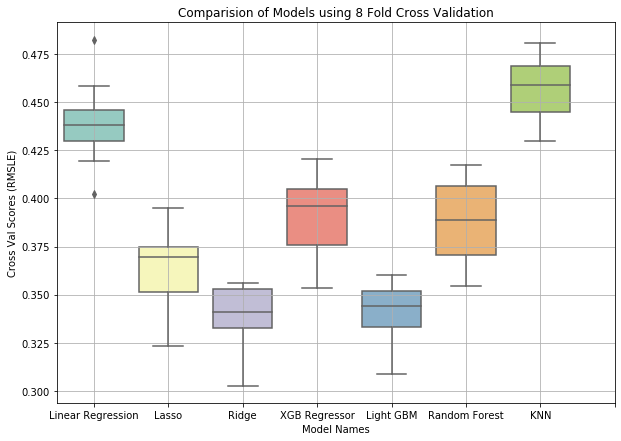

In [38]:
print("Model Stats")
cross_validation(strat1Array, y_log1, 8, "Strategy")

### Default Model and it's performance

RMS Log error of default model: 0.740
R squared: -0.001
y_pred: mean of prices = 18.36 $


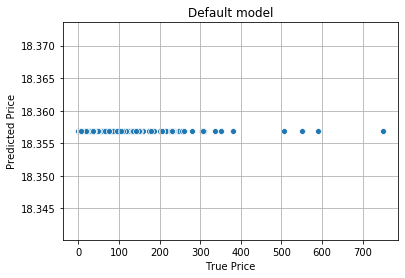

In [39]:
# Baseline Model Stats takes log prices as input
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error
def baseline_model(X,y):
    X_train, X_test, y_train, y_test = tts(X, y, random_state=42,test_size=0.3)
    pred = y_train.mean()
    y_pred = [pred for i in range(len(y_test))]
    print('RMS Log error of default model: %1.3f'%(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("R squared: %1.3f" %(r2_score(y_test, y_pred)))
    print("y_pred: mean of prices = %1.2f $"  %np.expm1(pred))
    
    sns.scatterplot(np.expm1(y_test), np.expm1(y_pred))
    plt.xlabel('True Price')
    plt.ylabel("Predicted Price")
    plt.title("Default model")
    plt.grid(True)
    plt.show()
    
    
baseline_model(strat1Array, y_log1)

### Plotting Results

In [40]:
# Scatter Plot of results
import seaborn as sns
def scatter_plot_of_results(y_test, y_pred, label, linear=True):
    sns.scatterplot(y_test, y_pred)
    
#     sns.regplot(x=y_test,y=y_pred)
    plt.axhline(y_test.mean(),color='black')
    plt.title(label)
    plt.xlim(0,300)
    plt.ylim(0,100)
    plt.xlabel('True Prices')
    plt.ylabel("Predicted Prices")
    plt.grid(True)
    plt.show()
    
    print("R_2 score: %1.3f" %(r2_score(np.log1p(y_test), np.log1p(y_pred))))
    print("RMSLE: %1.3f" %(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Prediction of default model: %1.2f $"  %y_test.mean())
    
    
def display_model_predictions(model, X_train, y_train, X_test, y_test, idx_train, idx_test, title):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scatter_plot_of_results(np.expm1(y_test), np.expm1(y_pred), title)
    result[title]=np.round(np.expm1(y_pred),2)


In [41]:
from sklearn.model_selection import train_test_split as tts
X=strat1Array; y=y_log1; indices = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, idx_train, idx_test = tts(X, y, indices, random_state=42,test_size=0.3)

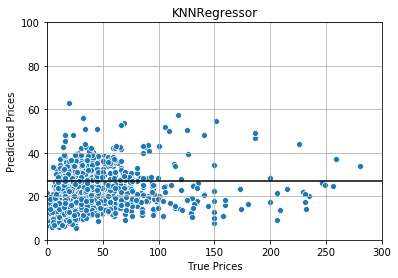

R_2 score: 0.165
RMSLE: 38.117
Prediction of default model: 26.84 $


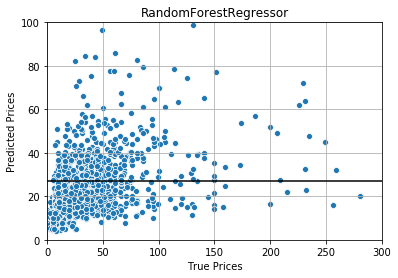

R_2 score: 0.338
RMSLE: 35.544
Prediction of default model: 26.84 $


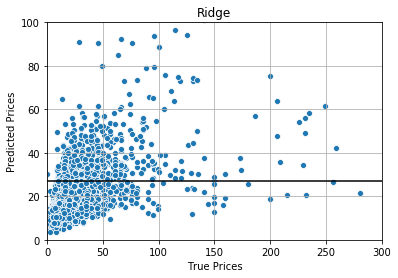

R_2 score: 0.386
RMSLE: 34.264
Prediction of default model: 26.84 $


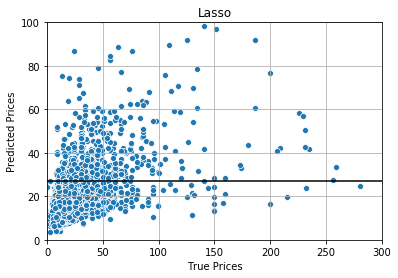

R_2 score: 0.392
RMSLE: 33.525
Prediction of default model: 26.84 $


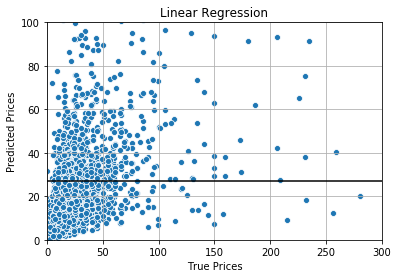

R_2 score: 0.084
RMSLE: 49.449
Prediction of default model: 26.84 $


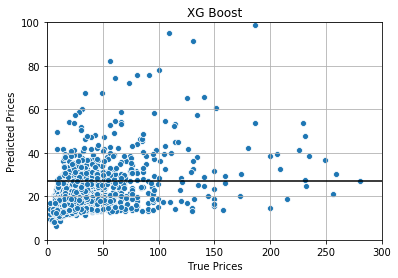

R_2 score: 0.302
RMSLE: 35.416
Prediction of default model: 26.84 $


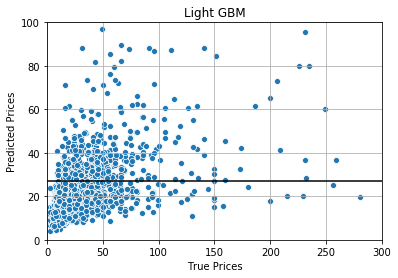

R_2 score: 0.389
RMSLE: 34.554
Prediction of default model: 26.84 $


,name,unprocessed_text,KNNRegressor,RandomForestRegressor,Ridge,Lasso,Linear Regression,XG Boost,Light GBM,Actual Price
train_id,,,,,,,,,,
6252,N64 super mario 64 (label stain),n64 super mario 64 (label stain) great item gr...,17.72,14.87,9.92,10.68,14.23,15.98,13.40,21.0
4684,Jordan 9c Retro Gamma 11s,jordan 9c retro gamma 11s size 9c gamma gamma ...,19.74,24.65,24.07,21.92,35.60,17.86,21.67,29.0
1731,5 Pair of Lashes + Lash Tweezers,5 pair of lashes + lash tweezers perfect for t...,11.24,11.39,5.30,7.59,5.94,13.08,11.67,7.0
4742,Bundle for LizKay,bundle for lizkay gb girls size 10. fits like ...,15.44,19.64,22.27,21.16,25.10,19.21,19.22,40.0
4521,New Balance Minimus size 8 - women,new balance minimus size 8 - women good used c...,24.32,26.33,34.00,31.79,23.03,27.76,24.85,16.0
6340,PINK Fanny pack,"pink fanny pack never been used, pink fanny pa...",22.48,11.78,15.51,16.71,8.88,14.97,15.92,10.0
576,OFRA BEVERLY HILLS HIGHLIGHTER,ofra beverly hills highlighter swatched full size,13.84,11.53,13.74,14.04,16.09,13.75,14.05,19.0
5202,Victoria secret swim small,victoria secret swim small victoria secret swi...,15.83,15.15,16.76,16.84,21.17,17.03,15.21,10.0
6363,MAD MATTE w/liner,mad matte w/liner liquid matte sold as a set o...,15.97,13.90,10.24,12.45,6.51,15.06,13.62,6.0


In [42]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, algorithm="kd_tree", weights="uniform")
ridge = Ridge(alpha=20)
lasso = Lasso(alpha =0.0005)
lr = LinearRegression()
rf=RandomForestRegressor(max_depth=100, n_estimators=1000)
xgBoost = xgb.XGBRegressor(random_state=42, silent=True)
lgbm = lgb.LGBMRegressor()

#############################

result=df[["name","unprocessed_text","price"]].iloc[idx_test]
display_model_predictions(knn, X_train, y_train, X_test, y_test, idx_train, idx_test, "KNNRegressor")
display_model_predictions(rf, X_train, y_train, X_test, y_test, idx_train, idx_test, "RandomForestRegressor")
display_model_predictions(ridge, X_train, y_train, X_test, y_test, idx_train, idx_test, "Ridge")
display_model_predictions(lasso, X_train, y_train, X_test, y_test, idx_train, idx_test, "Lasso")
display_model_predictions(lr, X_train, y_train, X_test, y_test, idx_train, idx_test, "Linear Regression")
display_model_predictions(xgBoost, X_train, y_train, X_test, y_test, idx_train, idx_test, "XG Boost")
display_model_predictions(lgbm, X_train, y_train, X_test, y_test, idx_train, idx_test, "Light GBM")
result["XG Boost"] = result["XG Boost"].apply(lambda x: round(float(str(x)),2))
price = result["price"]
result = result.drop(["price"], axis=1)
result["Actual Price"] = price
display(result.head(10))

In [43]:
coeffs = pd.DataFrame({'Feature_name':strat1columns,"Ridge": ridge.coef_}).sort_values(by="Ridge", ascending=False)

In [44]:
# coeffs = pd.DataFrame({'Feature_name':strat1columns,'Ridge_Coeff':ridge.coef_,'Lasso_Coeff':lasso.coef_, 'LR_Coeff':lr.coef_, "xgBoost Feature Imp":xgBoost.feature_importances_, "lgbm f Imp":lgbm.feature_importances_}).sort_values(by="Ridge_Coeff", ascending=False)

In [45]:
coeffs[["Ridge"]] = coeffs[["Ridge"]].apply(lambda x: round(x,3))

In [46]:
coeffs[coeffs["Feature_name"].str.contains("Brand_Apple")]

,Feature_name,Ridge
56,Brand_Apple,0.288


In [47]:
pd.DataFrame(columns=strat1columns)

,item_condition_id,shipping,Brand_47 Brand,Brand_7 For All Mankind®,Brand_90 Degree By Reflex,Brand_A Bathing Ape,Brand_A Plus Child Supply,Brand_A+D,Brand_AG Adriano Goldschmied,Brand_ALDO,...,years,yellow,yes,yeti,yoga,york,youth,zara,zip,zipper


In [48]:
coeffs.head(20).sample(10).sort_values(by=["Ridge"],ascending=False)

,Feature_name,Ridge
976,Sub_Cat_2_Cell Phones & Smartphones,0.535
134,Brand_Burberry,0.369
851,Sub_Cat_1_Shoes,0.349
409,Brand_Louis Vuitton,0.336
1479,authentic,0.312
1987,gucci,0.275
606,Brand_SeneGence,0.251
895,Sub_Cat_2_Athletic,0.237
1906,flawless,0.237
2534,priority,0.234


In [49]:
import pprint

In [50]:
dummy = df.sample(1)
pprint.pprint(dummy.to_json(orient='records'))

('[{"name":"Xbox 360 bundle 2 white '
 'controllers","item_condition_id":0.5,"brand_name":"Xbox","price":13.0,"shipping":0,"item_description":"Bundle '
 'for SunCity. 2 Xbox controllers. This is a white Microsoft Xbox 360 '
 "controller. Works perfect but the battery door in back missing. I don't have "
 'the power cord that plugs in to use but Tested. Comes from smoke and pet '
 'free home.","general_cat":"Electronics","subcat_1":"Video Games & '
 'Consoles","subcat_2":"Accessories","unprocessed_text":"xbox 360 bundle 2 '
 'white controllers bundle for suncity. 2 xbox controllers. this is a white '
 'microsoft xbox 360 controller. works perfect but the battery door in back '
 "missing. i don't have the power cord that plugs in to use but tested. comes "
 'from smoke and pet free home.","processed_text":"xbox 360 bundle 2 white '
 'controllers bundle for suncity  2 xbox controllers  this is a white '
 'microsoft xbox 360 controller  works perfect but the battery door in back '
 'missin

In [51]:
coeffs["Feature_name"].str.contains("Brand")

976     False
2228    False
2223    False
363      True
134      True
        ...  
1148    False
1007    False
870     False
0       False
2857    False
Name: Feature_name, Length: 3118, dtype: bool

In [52]:
coeffs[~coeffs["Feature_name"].str.contains("Brand")].head(40)

,Feature_name,Ridge
976,Sub_Cat_2_Cell Phones & Smartphones,0.535
2228,lululemon,0.442
2223,lularoe,0.393
851,Sub_Cat_1_Shoes,0.349
1479,authentic,0.312
2541,prom,0.281
1987,gucci,0.275
1783,diamond,0.247
1906,flawless,0.237
895,Sub_Cat_2_Athletic,0.237


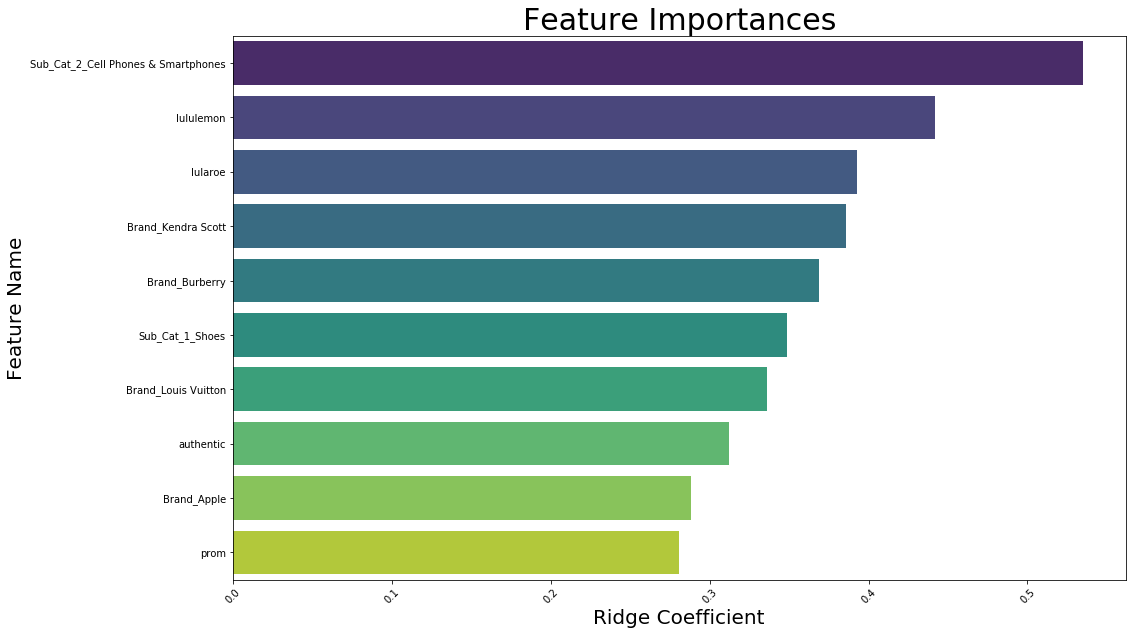

In [53]:
coeffs_head = coeffs.head(10)
plt.figure(figsize=(16,10))
sns.barplot(y="Feature_name", x="Ridge", data=coeffs_head, palette="viridis")
sns.color_palette("Paired")
plt.xlabel("Ridge Coefficient", fontsize=20)
plt.ylabel("Feature Name", fontsize=20)
plt.title("Feature Importances", fontsize=30)
plt.xticks(rotation =45)
plt.show()

In [54]:
display(coeffs.tail(50))

,Feature_name,Ridge
2242,makeup,-0.151
1213,Sub_Cat_2_Pumps,-0.151
2490,plug,-0.151
1588,bundle deals,-0.151
2576,ratings,-0.152
2133,lanyard,-0.152
2619,rings,-0.153
2654,sample,-0.154
1669,clear,-0.155
2369,nose,-0.156


In [55]:
result.sort_values(by=["Ridge"], ascending=False).head(10)

,name,unprocessed_text,KNNRegressor,RandomForestRegressor,Ridge,Lasso,Linear Regression,XG Boost,Light GBM,Actual Price
train_id,,,,,,,,,,
5780,Nike lebron 13 usa olympics size 12,nike lebron 13 usa olympics size 12 here is a ...,34.56,51.54,181.45,136.90,688.90,42.56,103.16,56.0
337,NEW Coach Ray Outline Sig High Tops,new coach ray outline sig high tops coach ray ...,17.34,77.67,140.97,84.69,261.06,52.99,116.79,56.0
8687,(24hrs sale) Macbook air 11.6in (2013),(24hrs sale) macbook air 11.6in (2013) ❌❌firm ...,18.50,28.58,139.05,167.95,1458.71,96.13,76.23,550.0
4961,Jordan Retro 11 Low UNC,jordan retro 11 low unc trying to sell asap. t...,50.09,102.80,124.76,89.77,227.38,94.88,114.45,109.0
4656,NMD R_1 White/Black Reflective M10.5US,nmd r_1 white/black reflective m10.5us ****men...,49.12,106.51,119.00,91.78,169.39,99.01,103.67,186.0
149,LIKE NEW IPHONE 5C,like new iphone 5c just upgraded so now finall...,17.61,147.25,111.76,108.76,169.79,126.87,134.30,104.0
9340,Kate Spade Sunglasses,kate spade sunglasses authentic gold and pink ...,27.90,39.68,107.63,82.77,59.26,40.14,76.24,56.0
7381,Air Jordan 11 Low Concord,air jordan 11 low concord great condition 8/10...,54.42,77.21,103.57,97.16,221.61,60.64,84.71,151.0
7949,Acer aspire switch New,acer aspire switch new acer aspire switch 10 s...,27.26,82.73,101.76,150.52,786.36,75.72,66.16,81.0


In [56]:
df[df["name"].str.contains("Rolex")]

,name,item_condition_id,brand_name,price,shipping,item_description,general_cat,subcat_1,subcat_2,unprocessed_text,processed_text,lemmatized_text
train_id,,,,,,,,,,,,


In [57]:
lr_ensemble = Lasso()
X_ = result[["Ridge", "Lasso","Linear Regression","XG Boost", "Light GBM"]]
y_ = result[["Actual Price"]]
lr_ensemble.fit(X_,y_)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lr_ensemble.intercept_

array([-5.08037244])

In [59]:
lr_ensemble.coef_

array([-0.03744822,  0.6981428 ,  0.12617157,  0.44975318,  0.28882805])

In [60]:
result["ensemble"] = lr_ensemble.predict(X_)

In [61]:
result.head(50)

,name,unprocessed_text,KNNRegressor,RandomForestRegressor,Ridge,Lasso,Linear Regression,XG Boost,Light GBM,Actual Price,ensemble
train_id,,,,,,,,,,,
6252,N64 super mario 64 (label stain),n64 super mario 64 (label stain) great item gr...,17.72,14.87,9.92,10.68,14.23,15.98,13.40,21.0,14.857079
4684,Jordan 9c Retro Gamma 11s,jordan 9c retro gamma 11s size 9c gamma gamma ...,19.74,24.65,24.07,21.92,35.60,17.86,21.67,29.0,28.104742
1731,5 Pair of Lashes + Lash Tweezers,5 pair of lashes + lash tweezers perfect for t...,11.24,11.39,5.30,7.59,5.94,13.08,11.67,7.0,10.022910
4742,Bundle for LizKay,bundle for lizkay gb girls size 10. fits like ...,15.44,19.64,22.27,21.16,25.10,19.21,19.22,40.0,26.216297
4521,New Balance Minimus size 8 - women,new balance minimus size 8 - women good used c...,24.32,26.33,34.00,31.79,23.03,27.76,24.85,16.0,38.408604
6340,PINK Fanny pack,"pink fanny pack never been used, pink fanny pa...",22.48,11.78,15.51,16.71,8.88,14.97,15.92,10.0,18.456123
576,OFRA BEVERLY HILLS HIGHLIGHTER,ofra beverly hills highlighter swatched full size,13.84,11.53,13.74,14.04,16.09,13.75,14.05,19.0,16.479255
5202,Victoria secret swim small,victoria secret swim small victoria secret swi...,15.83,15.15,16.76,16.84,21.17,17.03,15.21,10.0,20.772143
6363,MAD MATTE w/liner,mad matte w/liner liquid matte sold as a set o...,15.97,13.90,10.24,12.45,6.51,15.06,13.62,6.0,14.756533


In [62]:
# display_model_predictions(rf, X_train, y_train, X_test, y_test, idx_train, idx_test, "Random Forest")

In [63]:
# df[np.logical_and(df["name"].str.contains("Louis"),  df["price"]>1 )]["price"].mean()

In [64]:
# result_copy = result[result.columns]

In [65]:
# result_copy["Ridge"] = round(((result["Ridge"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy["Lasso"] = round(((result["Lasso"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy["Linear Regression"] = round(((result["Linear Regression"] - result["Actual Price"])/result["Actual Price"])*100,3)
# result_copy["XG Boost"] = round(((result["XG Boost"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy["Light GBM"] = round(((result["Light GBM"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy["Default Model"] = round(((result["Default Model"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy["Ensemble"] = round(((result["ensemble"]-result["Actual Price"]) / result["Actual Price"])*100,3)
# result_copy.head(1000)

# columns=["Ridge","Lasso","Linear Regression","XG Boost", "Light GBM", "Default Model", "Ensemble"]
# def withinNPercent(df,n=20,default_column="Ridge"):
#     col=[val for val in df.columns if val not in columns]
#     col.append(default_column)
#     s1=df[col].loc[np.logical_and(df[default_column]<=n,df[default_column]>=-n),:]
#     print(default_column,"=",s1.shape[0])
#     print(round((s1.shape[0]/df.shape[0])*100,2),"% of predictions by",default_column,"are within",n,"% of the true price.")
# for val in columns:
#     withinNPercent(result,5,val)

### Hyperparameter Tuning 

In [66]:
# performanceDataFrame=pd.DataFrame(columns=['Fit', 'Best Estimator','R2 score'])
# #params is a dictionary with keys as the parameter and values as the list of values that we want to test for. 
# from sklearn.model_selection import GridSearchCV
# def gridSearchCV(X, y, params, modelObject,performanceData):
#     clf=GridSearchCV(modelObject,param_grid=params)
#     clf.fit(X,y)
#     performanceData=performanceData.append({'Fit':type(modelObject).__name__,'Best Estimator':clf.best_estimator_,'R2 score':clf.best_score_},ignore_index=True)
#     return performanceData

In [67]:
# # Ridge regression
# X=strat1Array
# y=y_log1
# params={'alpha':[1,2,3]}
# modelObject=Ridge()
# performanceDataFrame=gridSearchCV(X,y,params,modelObject,performanceDataFrame)

In [68]:
# # Random Forest 
# X=strat2pca
# y=y_log1
# params={'n_estimators':[10,100,500,1000,2000],'max_depth':[10,100,500,1000],'max_features':['auto','sqrt','log2'],'bootstrap':['True','False']}
# modelObject=RandomForestRegressor()
# performanceDataFrame=gridSearchCV(X,y,params,modelObject,performanceDataFrame)

In [69]:
# pd.DataFrame({"Features" : X.columns, " Regression Coefficient": lr.coef_ })

In [70]:
# def pipeLine():
# # Inputs: Size of data set

In [71]:
# from sklearn.preprocessing import PolynomialFeatures

In [72]:
# pf = PolynomialFeatures()

In [73]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors=10)
# knn.fit(X_train,y_train)
